In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# CONSTANTS

In [2]:
DATASET_FILE_LOCATION = 'Dataset/multivariate_dataset/Sorted_IGBT_Data/'
FILENAME_DATASET_PREFIX = 'sorted_multivariate_IGBT_'

INDEX_TEST_IGBT = 5
colNames = ['V_ce', 'CaseTemp', 'CycleCount']
OFFSET_V_CE = 0.1
OFFSET_CASETEMP = 0

# Model initialization

In [3]:
# Initialize the Random Forest Regressor with specified parameters.
model_rf_both = RandomForestRegressor(n_estimators=100, 
                                      warm_start=True)
model_rf_V_ce = RandomForestRegressor(n_estimators=100, 
                                      warm_start=True)

# Train Dataset Preparation

------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_1.csv


------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_2.csv
------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_3.csv
------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_6.csv


/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/matplotlib/figure.py:456: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  warnings.warn(


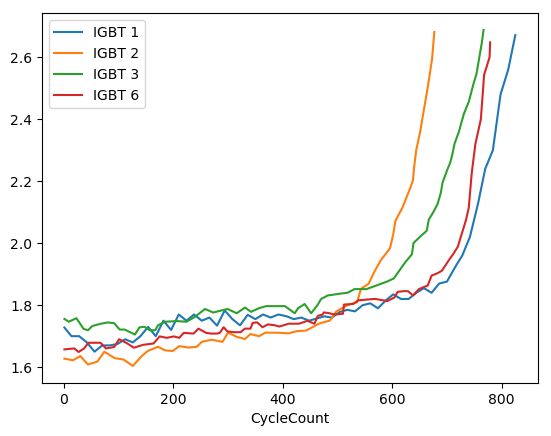

In [4]:
# Prepare training data
dfs = []
fig, ax = plt.subplots()
for i in range(1, 7):
    if i!=INDEX_TEST_IGBT and i!=4:
        # Construct the file path and load the dataset.
        filename = DATASET_FILE_LOCATION + FILENAME_DATASET_PREFIX + str(i) + '.csv'
        print('------------ ', filename)
        df = pd.read_csv(filename, header=0, index_col=0)

        # Sort the dataset by 'CycleCount' to ensure data consistency.
        df = df.sort_values(by='CycleCount')

        # Plotting V_ce vs CycleCount for each IGBT dataset
        df.plot(ax=ax, x='CycleCount', y='V_ce', label=f'IGBT {i}')

        # Fitting model with current IGBT data
        train_X = df.drop(columns=['CycleCount'])
        train_y = df['CycleCount']

        data_x = np.array(train_X)
        data_y = np.array(train_y).reshape(-1,1).ravel()
        model_rf_both.fit(data_x, data_y)

fig.show()

# Test Dataset Prep

/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/matplotlib/figure.py:456: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  warnings.warn(


<Figure size 1000x700 with 0 Axes>

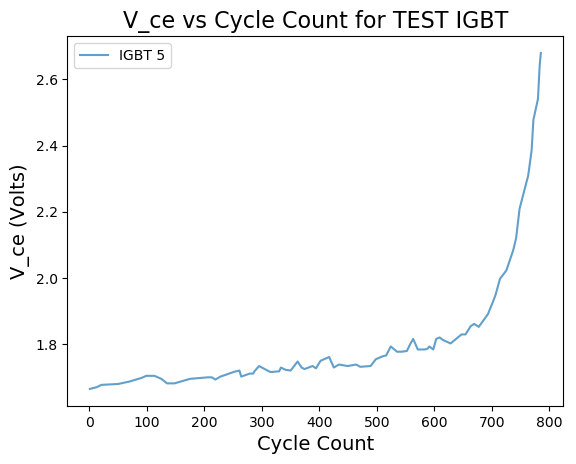

In [5]:
# Define your datasets location and the IGBT numbers to include in the plot
igbts_to_include = [INDEX_TEST_IGBT]

# Initialize a plot
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()

# Loop through each IGBT, load its dataset, and plot V_ce vs Cycle Count with a line plot
for i in igbts_to_include:
    filename = DATASET_FILE_LOCATION + FILENAME_DATASET_PREFIX + str(i) + '.csv'
    test_dataset = pd.read_csv(filename, index_col=0)

    # Sorting by 'CycleCount' to ensure the line plot makes sense
    test_dataset.sort_values('CycleCount', inplace=True)

    # Plotting with a less thick line
    test_dataset.plot(ax=ax, x='CycleCount', y='V_ce', label=f'IGBT {i}', linewidth=1.5, alpha=0.7)

# Customize the plot
plt.title('V_ce vs Cycle Count for TEST IGBT', fontsize=16)
plt.xlabel('Cycle Count', fontsize=14)
plt.ylabel('V_ce (Volts)', fontsize=14)
plt.legend()

# Show plot
fig.show()

# # Plot ALL-IN-ONE: training + test
# plt.scatter(x=train_y[:].values, y=train_X.iloc[:,0], )
# plt.plot(df['CycleCount'], df['V_ce'], label=f'IGBT {i}', linewidth=1.5, alpha=0.7)

# PREDICTION

## Multivariate

In [6]:
initial_feed_x = np.array(test_dataset[['V_ce','CaseTemp']].head(100))
initial_feed_y = np.array(test_dataset['CycleCount'].head(100)).reshape(-1,1).ravel()

In [7]:
# Fit initial feed
model_rf_both.fit(X = initial_feed_x, y = initial_feed_y)

/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestRegressor(warm_start=True)

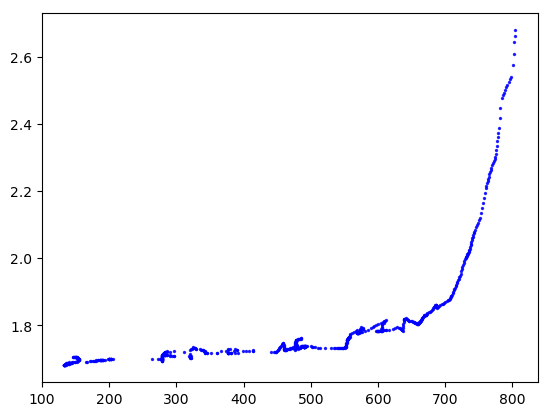

In [8]:
# Predict on rest of test dataset
predict_x_offset = np.array(test_dataset[['V_ce','CaseTemp']].iloc[101:])
predict_y_offset =  model_rf_both.predict(predict_x_offset)


plt.scatter(predict_y_offset, predict_x_offset[:,0], 
            color='blue', 
            label='Predicted on DC-Offset Data', 
            alpha=0.8, s=2
            )


### 3D Scatter plot for multivariate prediction

In [9]:
import plotly.express as px

df_results_multivar = pd.DataFrame()
df_results_multivar['V_ce_offset'] = predict_x_offset[:,0]
df_results_multivar['CaseTemp_offset'] = predict_x_offset[:,0]
df_results_multivar['cyclecount'] = predict_y_offset

fig = px.scatter_3d(df_results_multivar, x='cyclecount', y='CaseTemp_offset', z='V_ce_offset',
                    )
fig.update_traces(marker_size = 3)
fig.show()

## Single-variate: V_ce

In [10]:
df_offset_VCE_only = df_offset.drop(columns=['CaseTemp_offset'])

NameError: name 'df_offset' is not defined

In [ ]:
# Initial feed
initial_feed_x = df_offset_VCE_only.head(100)
initial_feed_y = test_dataset['CycleCount'].head(100)
model_rf_V_ce.fit(X = initial_feed_x, y = initial_feed_y)

In [ ]:
z = predict_x_offset['V_ce_offset'].to_numpy()

In [ ]:
# Predict on rest of test dataset
predict_x_offset = df_offset_VCE_only.iloc[101:]
predict_y_offset =  model_rf_V_ce.predict(predict_x_offset)

# plt.plot(predict_y_offset, predict_x_offset['V_ce_offset'].to_numpy(), 
#             color='blue', 
#             label='Predicted on DC-Offset Data', 
#             # alpha=0.8, s=5
#             )

plt.scatter(predict_y_offset, predict_x_offset['V_ce_offset'], 
            color='blue', 
            label='Predicted on DC-Offset Data', 
            alpha=0.8, s=5
            )